In [1]:
if 'google.colab' in str(get_ipython()):
    !pip install git+https://github.com/ourownstory/neural_prophet.git # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes
    data_location = "https://raw.githubusercontent.com/ourownstory/neural_prophet/master/"
else:
    data_location = "../"

In [2]:
from collections import namedtuple
import pandas as pd
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet, set_log_level
# set_log_level("ERROR")

In [3]:
Experiment = namedtuple('Experiment', ['data', 'freq', 'model_config'])
experiments = [
    Experiment(
        data="air_passengers.csv",
        freq="MS",
        model_config={"seasonality_mode":"multiplicative"},
    ),
    Experiment(
        data="wp_log_peyton_manning.csv",
        freq="D",
        model_config={"n_changepoints": 50},
    ),
    Experiment(
        data="yosemite_temps.csv",
        freq="5min",
        model_config={"n_forecasts": 12, "n_lags": 36},
    ),
]

In [4]:
def run_experiment(e, plot=False):
    df = pd.read_csv(data_location + "example_data/" + e.data)
    print(" ---- running exp: {} (len: {}) ----".format(e.data, len(df)))
    folds = NeuralProphet(**e.model_config).crossvalidation_split_df(df, freq=e.freq, k=3, fold_pct=0.2, fold_overlap_pct=0.0)
    train, val = [], []
    for df_train, df_val in folds:
        m = NeuralProphet(**e.model_config)
        metrics_train = m.fit(df_train, freq=e.freq, plot_live_loss=False)
        metrics_val = m.test(df_val)
        train.append(metrics_train["MAE"].values[-1])
        val.append(metrics_val["MAE"].values[-1])
    if plot:
        future = m.make_future_dataframe(df_train, periods=len(df_val), n_historic_predictions=len(df_train))
        forecast = m.predict(future)
        fig = m.plot(forecast)
        plt.show()
    print("train MAE:", train)
    print("val MAE:", val)
    print("train MAE (avg):", sum(train)/len(train))
    print("val MAE (avg):", sum(val)/len(val))
    

INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 400


 ---- running exp: air_passengers.csv (len: 144) ----


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.30E+00, min: 7.76E-02
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 2.96E-01
Epoch[400/400]: 100%|██████████| 400/400 [00:02<00:00, 162.11it/s, SmoothL1Loss=0.000892, MAE=4.6, MSE=34.5, RegLoss=0] 
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE     MSE
1         0.019 22.265 734.347
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 400


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.69E-01, min: 1.11E+00
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 5.93E-01
Epoch[400/400]: 100%|██████████| 400/400 [00:03<00:00, 111.52it/s, SmoothL1Loss=0.000519, MAE=5.37, MSE=45.3, RegLoss=0] 
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE      MSE
1         0.013 26.476 1179.113
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 348


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.03E-02, min: 6.89E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 3.50E-01
Epoch[348/348]: 100%|██████████| 348/348 [00:03<00:00, 95.73it/s, SmoothL1Loss=0.000317, MAE=6.2, MSE=64.1, RegLoss=0]   
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE      MSE
1         0.006 28.566 1198.470


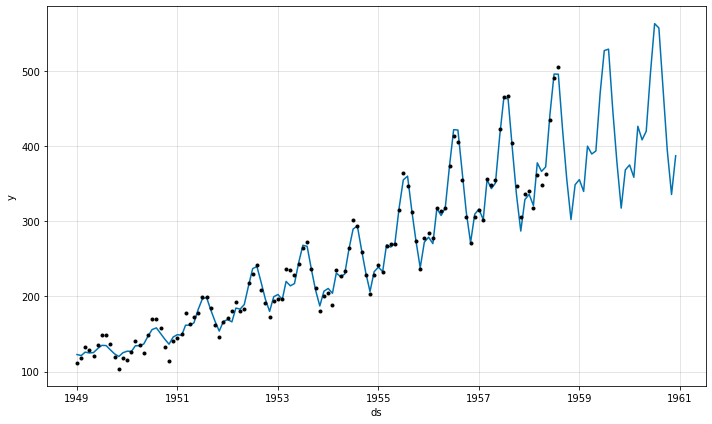

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 115


train MAE: [4.603702195485433, 5.371639078313654, 6.195795059204102]
val MAE: [22.26463508605957, 26.47610855102539, 28.5660400390625]
train MAE (avg): 5.39037877766773
val MAE (avg): 25.768927892049152
 ---- running exp: wp_log_peyton_manning.csv (len: 2905) ----


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.63E-02, min: 1.39E+00
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 5.04E-01
Epoch[115/115]: 100%|██████████| 115/115 [00:06<00:00, 18.33it/s, SmoothL1Loss=0.00458, MAE=0.276, MSE=0.157, RegLoss=0]
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE    MSE
1         0.131  1.855  4.490
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 103


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.56E-02, min: 1.61E+00
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 4.52E-01
Epoch[103/103]: 100%|██████████| 103/103 [00:08<00:00, 12.59it/s, SmoothL1Loss=0.00487, MAE=0.311, MSE=0.197, RegLoss=0]
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE    MSE
1         0.008  0.425  0.320
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 96


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.26E-02, min: 1.11E+00
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 3.74E-01
Epoch[96/96]: 100%|██████████| 96/96 [00:10<00:00,  9.38it/s, SmoothL1Loss=0.00518, MAE=0.327, MSE=0.218, RegLoss=0]
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE    MSE
1         0.005  0.319  0.229


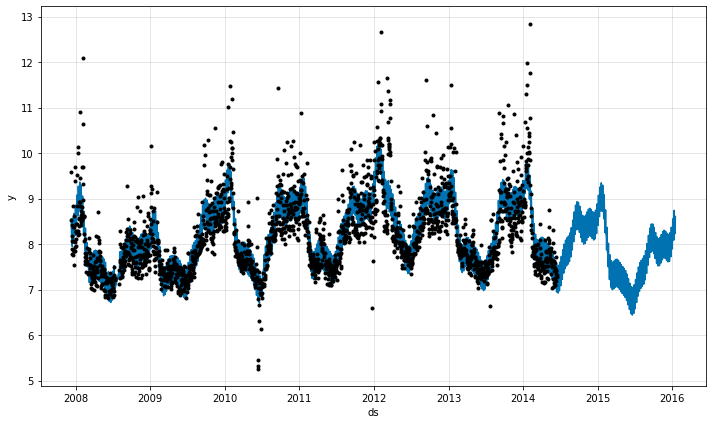

INFO - (NP.forecaster._handle_missing_data) - 12 NaN values in column y were auto-imputed.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 75


train MAE: [0.2764622799911105, 0.31099176023858616, 0.32657928603241243]
val MAE: [1.8549890518188477, 0.42525753378868103, 0.3186262547969818]
train MAE (avg): 0.304677775420703
val MAE (avg): 0.8662909468015035
 ---- running exp: yosemite_temps.csv (len: 18721) ----


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.62E-02, min: 3.94E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 1.36E-01
Epoch[75/75]: 100%|██████████| 75/75 [00:29<00:00,  2.52it/s, SmoothL1Loss=0.000656, MAE=0.945, MSE=2.35, RegLoss=0]
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE    MSE
1         0.001  1.161  3.046
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 69


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.14E-02, min: 4.34E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 2.13E-01
Epoch[69/69]: 100%|██████████| 69/69 [00:26<00:00,  2.59it/s, SmoothL1Loss=0.000576, MAE=0.95, MSE=2.46, RegLoss=0]
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE    MSE
1         0.001  1.146  3.040
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 66


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.65E-02, min: 3.45E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 1.47E-01
Epoch[66/66]: 100%|██████████| 66/66 [00:33<00:00,  1.95it/s, SmoothL1Loss=0.000448, MAE=0.932, MSE=2.43, RegLoss=0]
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE    MSE
1         0.001  2.239  6.590
WARNING - (NP.forecaster.make_future_dataframe) - Insufficient data for 14978 historic forecasts, reduced to 14942.
WARNING - (NP.forecaster.make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 12.


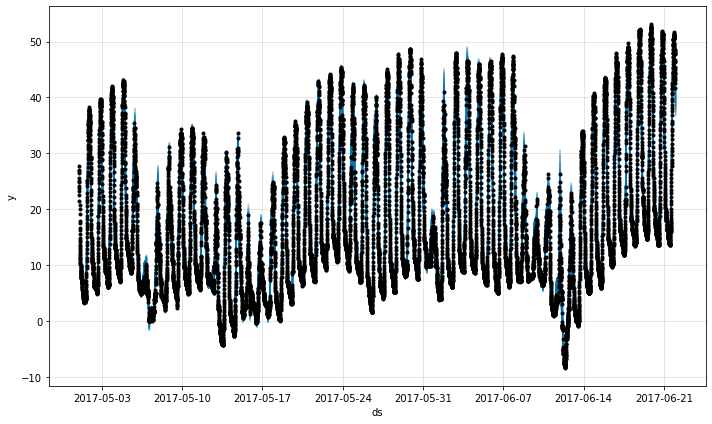

train MAE: [0.9448657129381465, 0.9504134631953141, 0.9323811498452204]
val MAE: [1.1606089452966362, 1.1462830899868237, 2.2389152405218553]
train MAE (avg): 0.9425534419928937
val MAE (avg): 1.515269091935105


In [5]:
for exp in experiments:
    run_experiment(exp, plot=True)